In [9]:
import keras as kr
from keras_visualizer import visualizer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import animation, rc
rc('animation', html='jshtml')
from matplotlib import cm
from matplotlib import gridspec

### Adding netron path 
MODULE_PATH = "/Users/sebastianyde/opt/miniconda3/lib/python3.9/site-packages/netron/__init__.py"
MODULE_NAME = "netron"
import importlib
import sys
spec = importlib.util.spec_from_file_location(MODULE_NAME, MODULE_PATH)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module 
spec.loader.exec_module(module)
import netron

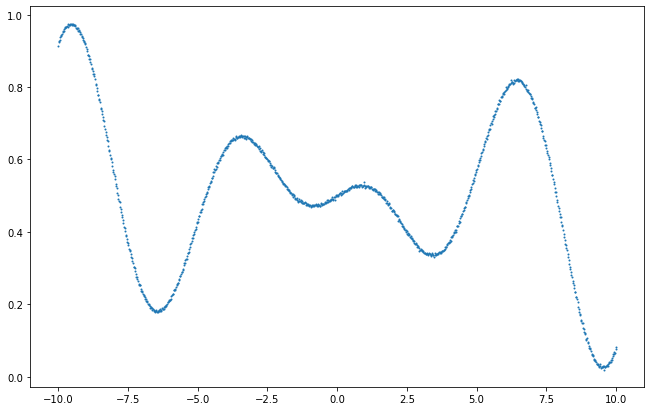

In [2]:
mu, sigma = 0, 0.05
N_points = 1000
x_train = np.linspace(-10, 10, num=N_points)
y_train = (x_train*np.cos(x_train)+np.random.normal(mu,sigma,size=N_points)+10)/20
fig, ax = plt.subplots(1,1,figsize=(11,7))
ax.plot(x_train,y_train,'o',ms=1)

In [3]:
N_epochs = 100

## Defining model
Model1 = kr.models.Sequential()
opt = kr.optimizers.SGD(learning_rate=0.01)  ## stochastic gradient descent
Hidden_layer = kr.layers.Dense(units = 64, input_dim=1, activation='relu') ## Hidden layer
Output_layer = kr.layers.Dense(units = 1,  activation='linear')            ## Output layer
Model1.add(Hidden_layer)
Model1.add(Output_layer)
## Compiling model
Model1.compile(loss='mean_squared_error',optimizer=opt) ## mean squared error loss with stochastic gradient descent
## Fitting model
History1 = Model1.fit(x_train, y_train, epochs=N_epochs, batch_size=3, verbose=False) ## verbose = False: no printing, verbose = True: printing 
Loss_1 = History1.history['loss']
## Storing prediction after training
Predictions_1 = Model1.predict(x_train)



## Defining model
Model2 = kr.models.Sequential()
Hidden_layer_1 = kr.layers.Dense(units = 64, input_dim=1, activation='relu') ## First hidden layer
Hidden_layer_2 = kr.layers.Dense(units = 64, activation='relu')              ## Second hidden layer
Output_layer_1 = kr.layers.Dense(units = 1,  activation='linear')            ## Output layer
Model2.add(Hidden_layer_1)
Model2.add(Hidden_layer_2)
Model2.add(Output_layer_1)
## Compiling model
Model2.compile(loss='mean_squared_error',optimizer=opt) ## mean squared error loss with stochastic gradient descent
## Fitting model
History2 = Model2.fit(x_train, y_train, epochs=N_epochs, batch_size=3, verbose=0) ## verbose = 0: no printing, verbose = 1: printing
Loss_2 = History2.history['loss']
## Storing prediction after training
Predictions_2 = Model2.predict(x_train)



2021-11-05 16:01:25.650051: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-05 16:01:25.651324: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


KeyboardInterrupt: 

In [ ]:

epoch_list = np.arange(1,N_epochs+1)

fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(x_train,y_train,'o',ms=2, label = 'data points')
ax[0].plot(x_train,Predictions_1, label = 'NN model 1 prediction')
ax[0].plot(x_train,Predictions_2, label = 'NN model 2 prediction')

ax[1].plot(epoch_list,Loss_1,label='Loss at epoch for NN model 1')
ax[1].plot(epoch_list,Loss_2,label='Loss at epoch for NN model 2')

ax[0].legend()
ax[1].legend()

plt.show()

In [ ]:
## Defining model for animation
Model3 = kr.models.Sequential()
Hidden_layer_1 = kr.layers.Dense(units = 64, input_dim=1, activation='relu') ## First hidden layer
Hidden_layer_2 = kr.layers.Dense(units = 64, activation='relu')              ## Second hidden layer
Output_layer_1 = kr.layers.Dense(units = 1,  activation='linear')            ## Output layer
Model3.add(Hidden_layer_1)
Model3.add(Hidden_layer_2)
Model3.add(Output_layer_1)
## Compiling model
Model3.compile(loss='mean_squared_error',optimizer='SGD') ## mean squared error loss with stochastic gradient descent

anim_predictions = []
for i in range(1,20):
    ## Fitting model
    History3 = Model3.fit(x_train, y_train, epochs=i, batch_size=3, verbose=0) ## verbose = 0: no printing, verbose = 1: printing 
    ## Storing prediction after training
    anim_predictions.append(Model3.predict(x_train))
    print(i)



## Defining plot ##
## Defining x- & y-limits for plot ##

fig, ax = plt.subplots(1,1,figsize = (14,10))
ax.plot(x_train,y_train,'o',label='data points',ms=2)
ax.set_title('Training Feed-Forward NN with 2 Hidden layer; ReLU activation',size=18)
NN_predictions, = ax.plot([],[],'--',color='orange',label='Neural Net ith prediction')


def update(i):
    NN_predictions.set_data(x_train,anim_predictions[i])

    return NN_predictions,



ax.legend(loc='upper right')

anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(anim_predictions),
                               interval=250,
                               blit=True,
                               repeat_delay=0)
# Set up formatting for the movie files

## uncomment below to save gif ##
writergif = animation.PillowWriter(fps=3) 
anim.save("FeedForward Neural Net training_2.gif", writer=writergif)

anim

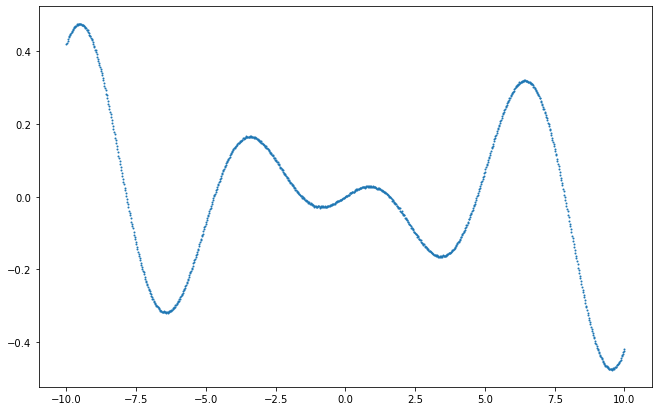

In [119]:
mu, sigma = 0, 0.02
N_points = 1000
x_train = np.linspace(-10, 10, num=N_points)
y_train = (x_train*np.cos(x_train)+np.random.normal(mu,sigma,size=N_points))/20
fig, ax = plt.subplots(1,1,figsize=(11,7))
ax.plot(x_train,y_train,'o',ms=1)

In [10]:
N_epochs = 600
Batch_size = 5
## Defining model
Model1 = kr.models.Sequential()
## Defining weight initialization method in acc. to 
## https://keras.rstudio.com/reference/initializer_glorot_uniform.html 

w_initializer = kr.initializers.glorot_uniform()
b_initializer = kr.initializers.Zeros()

## Defining layers
Input_layer = kr.layers.Dense(units = 1, activation='linear', input_dim = 1, name = 'Input_layer',
                               kernel_initializer=w_initializer, use_bias=False) ## Input layer

Hidden_layer_1 = kr.layers.Dense(units = 64, activation='relu', name = 'Hidden_layer_1', 
                               kernel_initializer=w_initializer, bias_initializer=b_initializer, use_bias=True) ## Hidden layer 1

Hidden_layer_2 = kr.layers.Dense(units = 64, activation='relu', name = 'Hidden_layer_2', 
                               kernel_initializer=w_initializer, bias_initializer=b_initializer, use_bias=True) ## Hidden layer 2

Output_layer = kr.layers.Dense(units = 1,  activation='linear', name = 'Output_layer',  use_bias=False)         ## Output layer

## Adding layers
Model1.add(Input_layer)
Model1.add(Hidden_layer_1)
Model1.add(Hidden_layer_2)
Model1.add(Output_layer)

## Defining optimizer
opt = kr.optimizers.SGD(learning_rate=0.01)  ## stochastic gradient descent

## Compiling model
Model1.compile(loss='mean_squared_error',optimizer=opt) ## mean squared error loss 

## Creating callback for early stopping after no improvement in chosen metric 
callback = kr.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)

## Fitting model
History1 = Model1.fit(x_train, y_train, epochs=N_epochs, 
                      batch_size=Batch_size, callbacks=[callback], verbose=False) ## verbose: printing/no printing

## Storing prediction and loss history after training
Predictions_1 = Model1.predict(x_train)
Loss_1 = History1.history['loss']

#kr.utils.plot_model(Model1,to_file="model.png",show_layer_names=True,show_shapes = True,dpi=96)
Model1.summary()
Model1.save('NN_model.h5')
netron.start('NN_model.h5')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 1)                 1         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 64)                128       
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 64)                4160      
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 64        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
Serving 'NN_model.h5' at http://localhost:8080


('localhost', 8080)

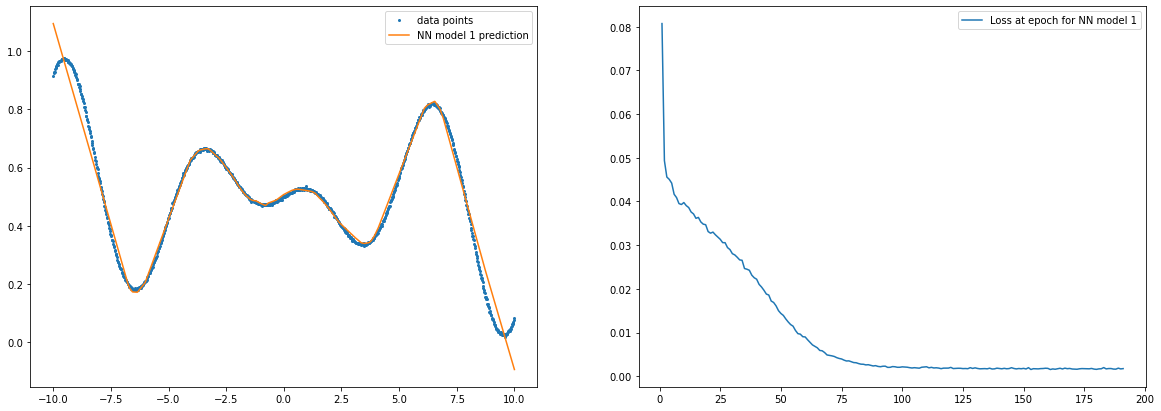

In [7]:
epoch_list = np.arange(1,N_epochs+1)

fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(x_train,y_train,'o',ms=2, label = 'data points')
ax[0].plot(x_train,Predictions_1, label = 'NN model 1 prediction')

ax[1].plot(epoch_list[:len(Loss_1)],Loss_1,label='Loss at epoch for NN model 1')

ax[0].legend()
ax[1].legend()

plt.show()